
# kaggleのデータセットを用いてモデルを構築する

### 目的：100kmあたりのガソリン消費量を予測する
###  URL:https://www.kaggle.com/anderas/car-consume

・利用するデータ「measurements.csv」（データ数：388行12列）

| 列 | 項目 | 項目名 | 欠損有無 | 利用有無 |
| :--- | :--- | :--- | :---: | :---: |
|  1 | distance | 走行していたキロメートル単位の距離 | - | ○ |
|  2 | consume | ディスプレイに表示される100キロメートルあたりのリットル単位の消費 | - | ○ |
|  3 | speed | 平均速度 | - | ○ |
|  4 | temp_inside | 加熱の設定 | 欠損あり | × |
|  5 | temp_outside | 外気温度 | - | ○ |
|  6 | specials | 雨または雪、気候変動が発生している場合（「AC」） | 欠損あり | × |
|  7 | gas_type | 最後の補充時に使用されたガスタイプ | - | ○ |
|  8 | AC | ホットエンコードされた特別な「AC」 | - | ○ |
|  9 | rain | 雨/雪 | - | ○ |
| 10 | sun | 晴れ | - | ○ |
| 11 | refill liters | リフィルリッター | 欠損あり | × |
| 12 | refill gas| リフィルガス | 欠損あり | × |

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

# 警告非表示
import warnings
warnings.filterwarnings('ignore')

In [27]:
# データセット読込
#df= pd.read_csv('./measurements.csv')
df = pd.read_excel("./measurements2.xlsx")

# 欠損項目および不要項目を削除
df = df.drop(['temp_inside','specials','refill liters','refill gas','gas_type','rain','sun','AC'], axis=1)

#print("\n▼ 欠損項目を確認")
#print(df.isnull().sum())

#print("\n▼ 各項目の項目値を確認")
#print(df['gas_type'].unique())

# ダミー変換
#df_dummy1 = pd.get_dummies(df['gas_type'])
#df = pd.concat([df.drop(['gas_type'],axis=1),df_dummy1],axis=1)

# データ並び替え
df = df.ix[:,[1,0,2,3]]

df.index.name="id"

print("\n▼ csvデータ確認")
display(df.head())

#print("\n▼ 統計量確認")
#df.describe()
#print(df.info())



▼ csvデータ確認


,consume,distance,speed,temp_outside
id,,,,
0,5.0,28.0,26,12
1,4.2,12.0,30,13
2,5.5,11.2,38,15
3,3.9,12.9,36,14
4,4.5,18.5,46,15


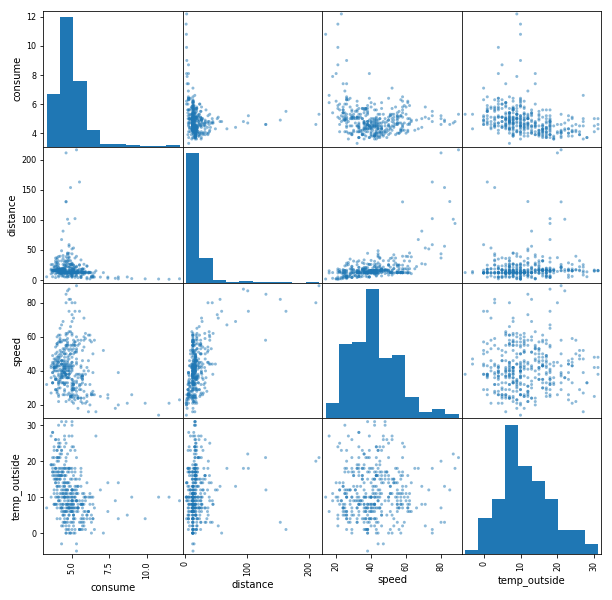

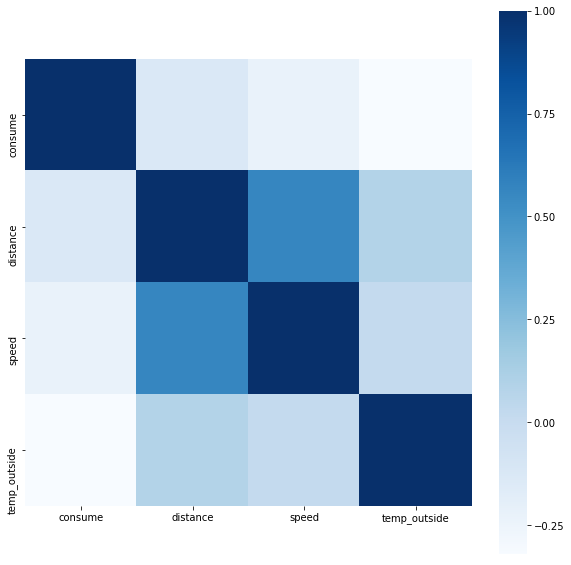

In [28]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

# 相関係数をヒートマップにして可視化
df.corr()
plt.figure(figsize=(10, 10)) 
sns.heatmap(df.corr(), square=True, cmap='Blues')
plt.show()


In [32]:
# 係数を求める
y = df["consume"].values
X = df.drop('consume', axis=1).values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

print("\n▼ 各重みを表示")
print('w0 = {:.3f}'.format( regr.intercept_))
idx = 0
for column_name in df.drop('consume', axis=1):
    print(column_name.ljust(15, ' ') + "---->   w{:.0f} = {:.3f}".format(idx + 1, regr.coef_[idx]))
    idx +=1




▼ 各重みを表示
w0 = 6.192
distance       ---->   w1 = 0.002
speed          ---->   w2 = -0.018
temp_outside   ---->   w3 = -0.047


In [33]:

# 重みと二乗誤差の確認
x1 = df['distance'].values
x2 = df['speed'].values
x3 = df['temp_outside'].values
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3                    # regr.predict(X)の結果と同じになる
squared_error1 = 0.5 * np.sum((y - y_est) ** 2)
print('二乗誤差 = {:.3f}'.format(squared_error1))


# 値を予測
y_pred = regr.predict(X)

# 二乗誤差
squared_error = 0.5 * np.sum((y - y_pred) ** 2)
print('二乗誤差 = {:.3f}'.format(squared_error))

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

二乗誤差 = 174.844
二乗誤差 = 174.844
MSE = 0.901
MAE = 0.633
RMSE = 0.949
